In [1]:
from fastai.vision.all import *
from pathlib import Path
import h5py
from matplotlib import cm

import os
kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

In [60]:
path = '/kaggle/input/jet-images-train-val-test/jet-images_train.hdf5'
classes = ["general", "W-boson"]
    
h5_file = h5py.File(path, 'r')
signal_data = h5_file['signal']
image_data = h5_file['image']

def label_func(x):
    signal = signal_data[int(x)]
    return classes[int(signal)]

def get_items(x):
    l = len(image_data)
    return [str(i) for i in range(l)]

def get_x(x):
    return torch.from_numpy(image_data[int(x)])


In [61]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_items,
                   get_x = get_x,
                   get_y     = label_func,
                   splitter  = RandomSplitter(),)

In [62]:
#timing function to see differences in loadtime
import timeit
start_time = timeit.default_timer()

dsets = dblock.datasets(path)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time
print(f"Loading time: {elapsed_time:.5f} seconds")
print(f"Images: {len(image_data)}")



Loading time: 73.87340 seconds
Images: 628320


Loading time: 5.62048 seconds
Images: 628320


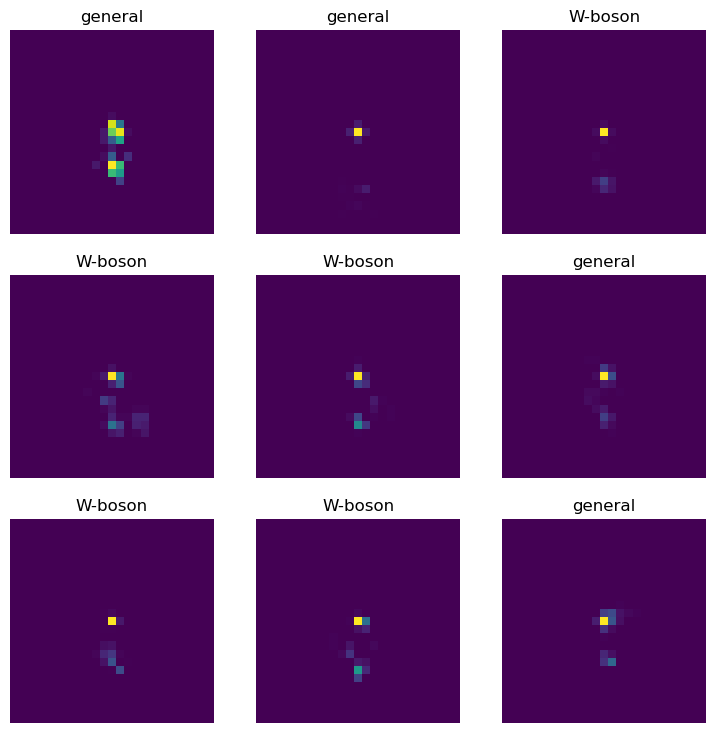

In [63]:
start_time = timeit.default_timer()

dls = dblock.dataloaders(path)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time
print(f"Loading time: {elapsed_time:.5f} seconds")
print(f"Images: {len(image_data)}")

dls.show_batch()

In [44]:
dsets.train[0][1].shape

torch.Size([])

In [64]:
learner_original = vision_learner(dls,arch="resnet18",  metrics=accuracy)

In [65]:
learner_original.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.505593,0.472927,0.779372,15:35


epoch,train_loss,valid_loss,accuracy,time
0,0.464115,0.466846,0.779515,15:15
1,0.437844,0.428291,0.804487,15:25
2,0.424732,0.427606,0.807240,15:27
3,0.415788,0.407988,0.817601,15:31


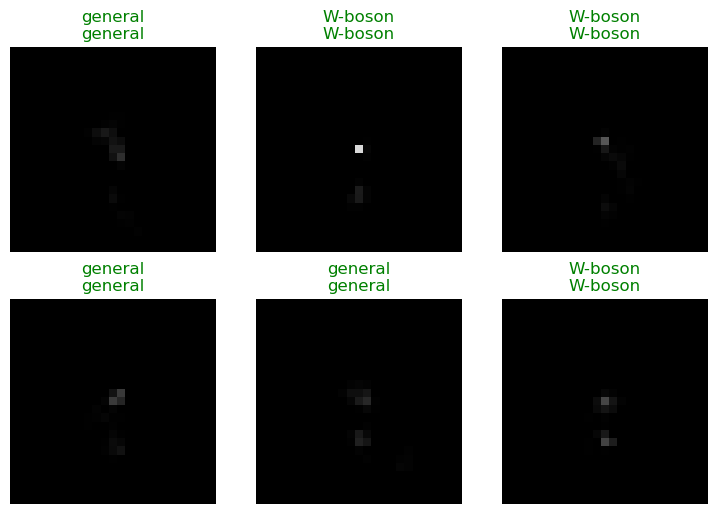

In [66]:
learner_original.show_results(max_n=6, )

In [36]:
learner_original.dls.vocab

['W-boson', 'general']

In [37]:
testImages = h5py.File(path, 'r')['image'][1000:1010]
for ind in range(len(testImages)-1):
    prediction = learner_original.predict(testImages[ind])
    print(prediction)



('W-boson', TensorBase(0), TensorBase([9.9957e-01, 4.2701e-04]))


('W-boson', TensorBase(0), TensorBase([9.9960e-01, 3.9557e-04]))


('general', TensorBase(1), TensorBase([0.4665, 0.5335]))


('general', TensorBase(1), TensorBase([0.4623, 0.5377]))


('W-boson', TensorBase(0), TensorBase([0.7777, 0.2223]))


('W-boson', TensorBase(0), TensorBase([0.8608, 0.1392]))


('W-boson', TensorBase(0), TensorBase([0.6311, 0.3689]))


('W-boson', TensorBase(0), TensorBase([0.9805, 0.0195]))


('general', TensorBase(1), TensorBase([0.1538, 0.8462]))


In [38]:
interp = ClassificationInterpretation.from_learner(learner_original)

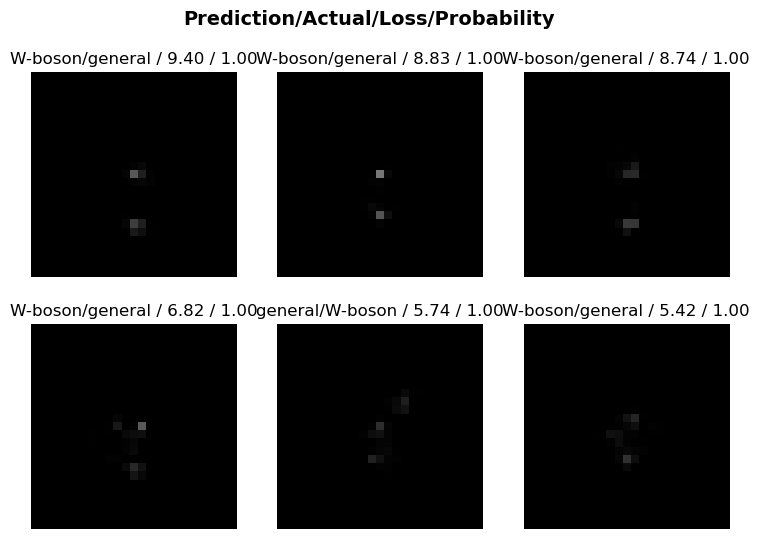

In [39]:
interp.plot_top_losses(6)